## Machine Learning - Classification - Course Project

The course project will both review John Hollinger's NBA Advanced Statistics, by player, and attempt to cluster players into certain groups/themes using the Advanced Statistics

****Data dictionary****:

Each observation represents an individual player's Hollinger stats for that season. Columns and their appropriate definition follows as detailed by ESPN.com are as follows:

rank that player's PER rank for that given season

ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

orr Offensive rebound rate

drr Defensive rebound rate

rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

per Player Efficiency Rating is the overall rating of a player's per-minute statistical production. The league average is 15.00 every season.

va Value Added - the estimated number of points a player adds to a teamâ€™s season total above what a 'replacement player' (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards

ewa Estimated Wins Added - Value Added divided by 30, giving the estimated number of wins a player adds to a team's season total above what a 'replacement player' would produce.

PER - sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance

### Objective

The objective of this assignment is to use advanced statistics, from John hollinger's advanced NBA  Statistics, in an attempt to both cluster/theme certain types of players, based on their underlying advanced statistics

To determine this, the following input statistics will be used from Hollinger's NBA advanced statistics:

1. ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

2. ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

3. to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

4. usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

5. orr Offensive rebound rate

6. drr Defensive rebound rate

7. rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

8. Minutes per game (mpg): the amount a player plays - affects usage and efficiency

### Data Loading & Cleaning - Hollinger Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits as mp
import mpl_toolkits
import seaborn as sns
sns.set()

In [2]:
# read in the data:
# data downloaded and saved as a csv from Kaggle datasets
data = pd.read_csv('hollingersStats.csv')
data.head()

,Unnamed: 0,rank,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,player,team,season
0,1,1,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01,452.0,15.1,Tracy McGrady,ORL,2002-03
1,2,2,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43,356.2,11.9,Shaquille O'Neal,LAL,2002-03
2,3,3,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07,420.6,14.0,Kobe Bryant,LAL,2002-03
3,4,4,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46,370.8,12.4,Kevin Garnett,MIN,2002-03
4,5,5,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46,355.0,11.8,Tim Duncan,SA,2002-03


In [3]:
# can drop data unnamed, rank - the variables will have no meaning for the further analysis
# can drop per, va - will use ewa as a summary statistic (denoting how many wins a player addsa bove/beyond a replacement palyer)
adv_stats = data[['gp', 'mpg', 'ts%', 'ast', 'to', 'usg', 'orr', 'drr', 'rebr', 'ewa', 'player', 'season']]
adv_stats.head()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season
0,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,15.1,Tracy McGrady,2002-03
1,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,11.9,Shaquille O'Neal,2002-03
2,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,14.0,Kobe Bryant,2002-03
3,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,12.4,Kevin Garnett,2002-03
4,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,11.8,Tim Duncan,2002-03


In [4]:
# get the shape of the data and data types
print('Number of Rows:' , adv_stats.shape[0])
print('Number of Columns', adv_stats.shape[1])
adv_stats.info()

Number of Rows: 5404
Number of Columns 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gp      5404 non-null   int64  
 1   mpg     5404 non-null   float64
 2   ts%     5404 non-null   float64
 3   ast     5404 non-null   float64
 4   to      5404 non-null   float64
 5   usg     5404 non-null   float64
 6   orr     5404 non-null   float64
 7   drr     5404 non-null   float64
 8   rebr    5404 non-null   float64
 9   ewa     5404 non-null   float64
 10  player  5404 non-null   object 
 11  season  5404 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 506.8+ KB


Note that for all entries (5404 rows/records) there are non-null values

In [5]:
# get the unique seasons the dataset covers
print(len(data['season'].unique().tolist()), 'seasons')

16 seasons


In [6]:
# check data for null/missing values: already checked above, but again for completeness
check_na = adv_stats.isnull()

# get a count of null (True) vs non-null (False)
print('Minutes/Game: ', check_na['mpg'].value_counts())
print('True Shooting %: ', check_na['ts%'].value_counts())
print('Assists: ', check_na['ast'].value_counts())
print('Turnovers: ', check_na['to'].value_counts())
print('Usage: ', check_na['usg'].value_counts())
print('Offensive Rebounding: ', check_na['orr'].value_counts())
print('Defensive Rebounding: ', check_na['drr'].value_counts())
print('Rebound Rate: ', check_na['rebr'].value_counts())
print('EWA: ', check_na['ewa'].value_counts())
print('Player: ', check_na['player'].value_counts())
print('Season: ', check_na['season'].value_counts())

Minutes/Game:  False    5404
Name: mpg, dtype: int64
True Shooting %:  False    5404
Name: ts%, dtype: int64
Assists:  False    5404
Name: ast, dtype: int64
Turnovers:  False    5404
Name: to, dtype: int64
Usage:  False    5404
Name: usg, dtype: int64
Offensive Rebounding:  False    5404
Name: orr, dtype: int64
Defensive Rebounding:  False    5404
Name: drr, dtype: int64
Rebound Rate:  False    5404
Name: rebr, dtype: int64
EWA:  False    5404
Name: ewa, dtype: int64
Player:  False    5404
Name: player, dtype: int64
Season:  False    5404
Name: season, dtype: int64


The data shows all 5404 rows are populated for each feature of interest

In [7]:
# check the data type of each column
adv_stats.dtypes

gp          int64
mpg       float64
ts%       float64
ast       float64
to        float64
usg       float64
orr       float64
drr       float64
rebr      float64
ewa       float64
player     object
season     object
dtype: object

In [8]:
# make a copy of adv_stats, called final_data for go forward analysis
final_data = adv_stats.copy()

### Processing Data

In [9]:
# outliers: will only remove outliers from the gp (games played) data - but only for those with low gp, as being present/not present will skew the addition of value 

# get a summary of the data:
summary = final_data.describe()
summary

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,66.114360,24.545448,0.531777,15.992746,11.131625,18.066155,5.375093,14.653349,10.013583,3.322798
std,14.040918,7.954939,0.048009,8.033157,2.880580,4.733323,3.851429,5.817942,4.535166,4.612590
min,17.000000,7.000000,0.338000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,57.000000,17.900000,0.502000,10.000000,9.200000,14.700000,2.000000,10.000000,6.200000,0.200000
50%,70.000000,24.400000,0.532000,14.100000,10.900000,17.700000,4.000000,13.600000,8.950000,2.000000
75%,78.000000,31.200000,0.563000,20.600000,12.700000,21.100000,8.100000,18.600000,13.300000,5.000000
max,85.000000,43.100000,0.725000,48.700000,29.600000,42.500000,22.000000,38.000000,26.700000,32.300000


In [10]:
# will remove low outliers from the gp and Salary data
# determine iqr for each feature
gp_q1 = summary.loc['25%', 'gp']
gp_q2 = summary.loc['50%', 'gp']
gp_q3 = summary.loc['75%', 'gp']
gp_iqr = gp_q3 - gp_q1

# remove rows from data frame based on - 1.5*iqr (low side outlier removal)
# Helps reove injured players and those based on 10 day contracts
final_data = final_data[final_data['gp'] >= gp_q1 - 1.5*gp_iqr]

print('After removing low gp outliers: ', final_data.shape[0])

After removing low gp outliers:  5366


In [11]:
final_data

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season
0,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,15.1,Tracy McGrady,2002-03
1,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,11.9,Shaquille O'Neal,2002-03
2,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,14.0,Kobe Bryant,2002-03
3,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,12.4,Kevin Garnett,2002-03
4,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,11.8,Tim Duncan,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...
5399,69,14.2,0.417,8.4,11.0,9.1,4.6,13.9,9.1,-2.5,Josh Huestis,2017-18
5400,54,15.2,0.445,13.8,12.9,14.6,1.6,16.0,8.5,-2.2,Paul Zipser,2017-18
5401,48,10.9,0.439,11.5,15.0,16.2,2.8,12.0,7.4,-1.4,Abdel Nader,2017-18
5402,73,15.8,0.473,8.0,10.0,8.4,3.6,11.6,7.7,-4.0,Semi Ojeleye,2017-18


### Distribution of Data

In [12]:
# another summary of data
summary2 = final_data.describe().T
summary2

,count,mean,std,min,25%,50%,75%,max
gp,5366.0,66.425084,13.592727,26.000,58.000,70.000,78.000,85.000
mpg,5366.0,24.516735,7.965001,7.000,17.900,24.300,31.200,43.100
ts%,5366.0,0.531927,0.047927,0.338,0.502,0.532,0.563,0.725
ast,5366.0,16.008013,8.038026,1.200,10.000,14.100,20.600,48.700
to,5366.0,11.137029,2.881643,2.000,9.200,10.900,12.700,29.600
usg,5366.0,18.055535,4.736006,0.000,14.700,17.700,21.100,42.500
orr,5366.0,5.372736,3.845806,0.000,2.000,4.000,8.100,22.000
drr,5366.0,14.647372,5.811279,0.000,10.000,13.600,18.600,38.000
rebr,5366.0,10.009896,4.529315,0.000,6.200,8.950,13.300,26.700
ewa,5366.0,3.338595,4.623633,-7.000,0.200,2.000,5.000,32.300


Note that in the summary advanced stats (ewa), that the distribution will be lognormal - few players contirbute a larger number of estimated wins above repalcement. The majority of the league is average by this metric

We will bin our EWA data, based on its position relative to quartiles. Note we will keep all data, as it fully describes player performance (Note star/high performing players will be high outliers)

In [13]:
# next we will look at producing an ewa class feature from numerial to a categorical/ordinal feature (Q1, Q2, Q3, Q4)
s1 = summary.loc['25%', 'ewa']
s2 = summary.loc['50%', 'ewa']
s3 = summary.loc['75%', 'ewa']
smax = summary.loc['max', 'ewa']
ewa_class = []

for i in final_data['ewa']:
    if i < s1:
        ewa_class.append(1)
    elif i >= s1 and i < s2:
        ewa_class.append(2)
    elif i >= s2 and i < s3:
        ewa_class.append(3)
    else:
        ewa_class.append(4)
        
final_data['ewa class'] = ewa_class
final_data

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class
0,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,15.1,Tracy McGrady,2002-03,4
1,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,11.9,Shaquille O'Neal,2002-03,4
2,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,14.0,Kobe Bryant,2002-03,4
3,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,12.4,Kevin Garnett,2002-03,4
4,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,11.8,Tim Duncan,2002-03,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,69,14.2,0.417,8.4,11.0,9.1,4.6,13.9,9.1,-2.5,Josh Huestis,2017-18,1
5400,54,15.2,0.445,13.8,12.9,14.6,1.6,16.0,8.5,-2.2,Paul Zipser,2017-18,1
5401,48,10.9,0.439,11.5,15.0,16.2,2.8,12.0,7.4,-1.4,Abdel Nader,2017-18,1
5402,73,15.8,0.473,8.0,10.0,8.4,3.6,11.6,7.7,-4.0,Semi Ojeleye,2017-18,1


In [14]:
# Next, wil label each EWA class:
ewa = []
for i in final_data['ewa class']:
    if i == 4:
        ewa.append('Star Player')
    elif i == 3:
        ewa.append('Starter Level')
    elif i == 2:
        ewa.append('Replacement Level')
    else:
        ewa.append('Below Replacement Level')
        
final_data['EWA Label'] = ewa
final_data

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label
0,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,15.1,Tracy McGrady,2002-03,4,Star Player
1,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,11.9,Shaquille O'Neal,2002-03,4,Star Player
2,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,14.0,Kobe Bryant,2002-03,4,Star Player
3,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,12.4,Kevin Garnett,2002-03,4,Star Player
4,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,11.8,Tim Duncan,2002-03,4,Star Player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,69,14.2,0.417,8.4,11.0,9.1,4.6,13.9,9.1,-2.5,Josh Huestis,2017-18,1,Below Replacement Level
5400,54,15.2,0.445,13.8,12.9,14.6,1.6,16.0,8.5,-2.2,Paul Zipser,2017-18,1,Below Replacement Level
5401,48,10.9,0.439,11.5,15.0,16.2,2.8,12.0,7.4,-1.4,Abdel Nader,2017-18,1,Below Replacement Level
5402,73,15.8,0.473,8.0,10.0,8.4,3.6,11.6,7.7,-4.0,Semi Ojeleye,2017-18,1,Below Replacement Level


In [18]:
# will now look at the distribution of data with respect to each featureng to use)

# split salary_stats_data into x and y data. We will drop offensive and defensive rebounding rate and just use rebounding rate to avoid any 
# effects of multicollinearity
xcols = ['gp', 'mpg', 'ts%', 'ast', 'to', 'usg', 'rebr']
ycol = 'ewa class'

<AxesSubplot:ylabel='Frequency'>

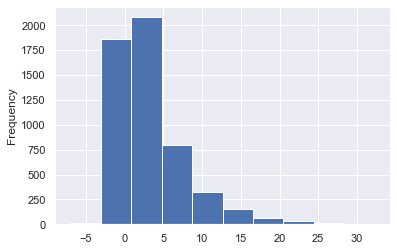

In [19]:
# plotting for numeric ewa
final_data['ewa'].plot.hist()

In [20]:
# count on ordinal class feature (ewa class)
y = final_data[ycol]

# get a feature count
y_count = y.value_counts()
y_count_norm = y.value_counts(normalize = True)
print('Raw Counts: ', y_count)
print('Normalized: ', y_count_norm)

Raw Counts:  2    1417
4    1364
3    1338
1    1247
Name: ewa class, dtype: int64
Normalized:  2    0.264070
4    0.254193
3    0.249348
1    0.232389
Name: ewa class, dtype: float64


By binning/classifying data according to ewa quartiles we've been able to create a reasonably balanced data set from quite imbalanced ewa/performance data

array([[<AxesSubplot:title={'center':'gp'}>,
        <AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'ts%'}>],
       [<AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'to'}>,
        <AxesSubplot:title={'center':'usg'}>],
       [<AxesSubplot:title={'center':'rebr'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

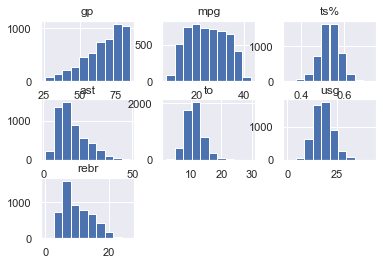

In [21]:
# next, lets look at distributions of each feature, to investigate what type of scaling is appropriate prior to classification
x = final_data[xcols]

# plot a histogram of each feature
x.hist()

As seen, some features are close to nomally distributed, while others are not. We will not apply a Boxcox transformation to noralize the data, but will use MinMaxScaling

#### Correlation Between Data & Features

Let's check correlations between features and the numerical ewa output

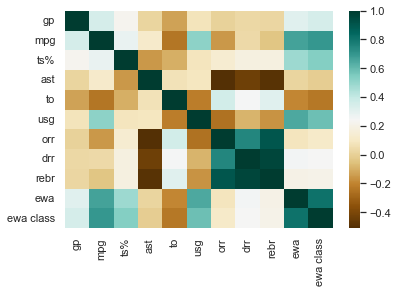

In [22]:
corr = final_data.corr()

# plot the heatmap
hm = sns.heatmap(corr, cmap = 'BrBG')

EWA has some moderate (be it +ve or -ve) correlation with each of the variables. this will likely increase when binning

Specifically with usage rate (+ve), turnover rate(-ve), true shooting % (+ve) and mpg (+ve)

#### Train/Test Split

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (3595, 7)
x_test:  (1771, 7)
y_train:  (3595,)
y_test:  (1771,)


#### Scaling Data

In [24]:
# now scale the data for regression using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# scale the data
m = MinMaxScaler()

# entire feature set scaling
x_train_scaled = m.fit_transform(x_train)
x_test_scaled = m.transform(x_test)

#### K-Means Clustering

Text(0, 0.5, 'Inertia')

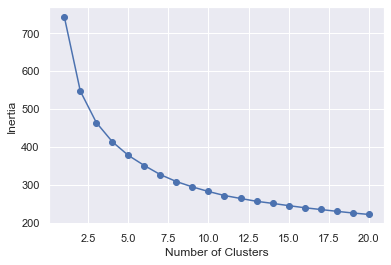

In [25]:
# will utilize the elbow method wit inertia to test for 1 to 20 clusters - we want large enough clusters to be able to fit a specific player profile
from sklearn.cluster import KMeans

# fit the data to the algorithm for each cluster count
inertia = []
num_clu = list(range(1, 21, 1))

for n in num_clu:
    km = KMeans(n_clusters = n, init = 'k-means++')
    km.fit(x_train_scaled)
    inertia.append(km.inertia_)
    
# plot the results
plt.plot(num_clu,inertia)
plt.scatter(num_clu,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [26]:
# checking numerically
clu_info = pd.DataFrame(inertia, num_clu, columns = ['Inertia'])
clu_info.index.name = 'N Clusters'

clu_info['Change'] = clu_info['Inertia'].diff()

clu_info

,Inertia,Change
N Clusters,,
1,743.338858,NaN
2,547.259074,-196.079784
3,464.247616,-83.011458
4,413.618217,-50.629399
5,377.648837,-35.969380
6,350.921349,-26.727488
7,326.918598,-24.002751
8,308.655867,-18.262731
9,294.581712,-14.074155


In [27]:
# checking the elbow curve and the change data, it seems as if the rate of inertia decrease slows slightly after ~4 clusters
# Rerunning with n_clu = 4
km4 = KMeans(n_clusters = 4, init = 'k-means++')
km4.fit(x_train_scaled)

KMeans(n_clusters=4)

In [29]:
# predict clusters for unseen data
km4.predict(x_test_scaled)

array([0, 0, 0, ..., 0, 0, 1])

In [41]:
# compare to test set
df1 = final_data.loc[x_test.index]
df1['Cluster Label - KM'] = km4.predict(x_test_scaled)
df1

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0
653,81,37.0,0.554,11.2,9.9,23.3,12.0,18.4,15.4,7.9,Elton Brand,2004-05,4,Star Player,0


#### Cluster Analysis

Will analyze the clusters to see if anything can be gathered from the 4 means clustering algorithm

Will group by cluster label and compare ewa and salary to get a profile of each cluster

In [42]:
first_cluster = df1[df1['Cluster Label - KM'] == 0]
first_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,65,38.7,0.583,14.9,6.5,20.6,5.1,11.2,8.2,13.5,Jimmy Butler,2014-15,4,Star Player,0
326,82,29.0,0.581,5.9,6.8,18.7,10.0,13.5,11.9,5.7,Antawn Jamison,2003-04,4,Star Player,0
1060,74,34.0,0.529,8.5,9.1,17.3,8.0,24.9,16.5,5.5,Troy Murphy,2005-06,4,Star Player,0
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0


In [43]:
first_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.0
mean,74.070103,33.092784,0.548858,13.141443,10.211546,20.942062,5.628866,16.595670,11.122062,7.325361,3.484536,0.0
std,7.837136,3.861316,0.036899,4.387227,2.121445,4.696095,3.309389,5.969475,4.346190,5.435010,0.742920,0.0
min,49.000000,23.400000,0.441000,2.900000,4.300000,9.500000,0.600000,5.400000,3.400000,-3.000000,1.000000,0.0
25%,70.000000,30.100000,0.523000,9.700000,8.800000,17.600000,3.000000,11.800000,7.800000,3.400000,3.000000,0.0
50%,76.000000,33.400000,0.549000,12.800000,10.100000,20.600000,5.000000,15.600000,10.300000,6.100000,4.000000,0.0
75%,81.000000,36.100000,0.572000,15.900000,11.600000,23.900000,8.000000,20.500000,14.100000,10.000000,4.000000,0.0
max,83.000000,42.500000,0.671000,26.100000,17.400000,38.200000,16.000000,34.900000,23.500000,28.100000,4.000000,0.0


After analyzing the data from this cluster, it appears juding by gp, mpg, shooting %, usage, and ewa that this cluster consists of Star Players
Star Player

In [44]:
second_cluster = df1[df1['Cluster Label - KM'] == 1]
second_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM
2550,71,10.1,0.459,29.0,11.9,19.4,0.8,10.2,5.4,0.1,Jeff Teague,2009-10,1,Below Replacement Level,1
582,77,20.8,0.485,20.1,11.5,14.8,3.0,11.5,7.2,0.1,John Salmons,2003-04,1,Below Replacement Level,1
5300,82,25.7,0.558,21.4,9.9,17.8,1.4,6.8,4.1,0.9,Patty Mills,2017-18,2,Replacement Level,1
3848,66,19.4,0.642,47.1,12.4,10.8,3.2,8.8,5.9,1.3,Pablo Prigioni,2013-14,2,Replacement Level,1
1833,68,29.7,0.468,15.3,9.8,21.1,2.0,11.2,6.4,1.6,Larry Hughes,2007-08,2,Replacement Level,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,81,28.0,0.498,22.7,7.8,8.9,4.0,9.0,6.5,-1.4,Trenton Hassell,2003-04,1,Below Replacement Level,1
1784,80,21.4,0.573,16.1,8.3,18.0,1.0,8.0,4.5,2.8,Roger Mason Jr.,2007-08,3,Starter Level,1
5267,65,20.0,0.553,20.7,13.3,21.5,1.6,10.6,6.1,1.6,Manu Ginobili,2017-18,2,Replacement Level,1
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1


In [45]:
second_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM
count,444.000000,444.000000,444.000000,444.000000,444.00000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0
mean,72.436937,26.309234,0.526682,25.626351,11.04482,18.561261,2.336937,10.146171,6.237838,2.929279,2.520270,1.0
std,8.539542,5.856453,0.043156,7.188950,2.14121,4.213542,1.303351,2.697940,1.732210,3.838383,1.046134,0.0
min,38.000000,8.700000,0.390000,8.400000,5.90000,8.900000,0.000000,0.000000,0.000000,-4.100000,1.000000,1.0
25%,67.000000,22.050000,0.498750,20.375000,9.60000,15.600000,1.500000,8.500000,5.200000,0.400000,2.000000,1.0
50%,74.000000,26.300000,0.526000,25.650000,10.90000,18.300000,2.000000,9.800000,5.900000,2.050000,3.000000,1.0
75%,80.000000,30.625000,0.553250,30.100000,12.40000,21.225000,3.000000,11.200000,7.000000,4.300000,3.000000,1.0
max,84.000000,40.200000,0.666000,47.100000,19.40000,31.700000,9.000000,22.000000,13.400000,26.000000,4.000000,1.0


After analyzing the data it appears this cluster contains Starter Level/high usage bench players - marked by relatively high mpg and usage, with an above average (3rd quertile EWA Class)

Starter Level

In [46]:
third_cluster = df1[df1['Cluster Label - KM'] == 2]
third_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM
4508,29,21.2,0.519,18.7,11.3,13.2,7.0,21.4,14.1,1.1,Rondae Hollis-Jefferson,2015-16,2,Replacement Level,2
475,45,15.0,0.586,7.4,9.0,17.9,1.0,10.0,5.3,0.6,Rasual Butler,2003-04,2,Replacement Level,2
2089,29,31.7,0.484,7.1,13.1,21.8,9.9,23.2,16.5,1.4,Elton Brand,2008-09,2,Replacement Level,2
1889,51,10.5,0.443,4.9,15.0,16.6,14.0,17.7,15.9,0.1,Dan Gadzuric,2007-08,1,Below Replacement Level,2
1567,54,10.8,0.499,25.2,16.2,13.1,8.0,13.4,10.6,0.1,Adrian Griffin,2006-07,1,Below Replacement Level,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,56,22.0,0.488,16.4,10.2,14.2,4.0,10.4,7.1,-1.3,Antoine Wright,2007-08,1,Below Replacement Level,2
4035,52,19.8,0.601,15.8,12.2,17.2,10.2,17.4,13.9,4.3,Tiago Splitter,2014-15,3,Starter Level,2
4415,51,12.9,0.577,8.5,11.9,14.2,10.0,20.7,15.4,2.3,Jeff Withey,2015-16,3,Starter Level,2
3415,39,28.7,0.555,19.6,10.4,22.0,0.8,7.3,4.1,3.0,Lou Williams,2012-13,3,Starter Level,2


In [47]:
third_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0
mean,46.914365,18.617127,0.504696,16.312155,11.629558,16.987569,4.669337,13.416575,9.024033,0.445028,1.690608,2.0
std,9.157947,5.865877,0.048910,7.633003,3.261882,4.526675,3.490196,5.151387,3.924121,1.531621,0.750527,0.0
min,26.000000,7.900000,0.340000,1.500000,4.600000,0.000000,0.000000,0.000000,0.000000,-3.300000,1.000000,2.0
25%,41.000000,14.100000,0.470250,10.525000,9.400000,13.900000,2.000000,9.600000,5.900000,-0.500000,1.000000,2.0
50%,48.500000,17.100000,0.503000,14.900000,11.350000,16.800000,3.350000,12.200000,8.000000,0.200000,2.000000,2.0
75%,54.000000,22.300000,0.536000,20.975000,13.500000,19.700000,7.000000,16.700000,11.675000,1.000000,2.000000,2.0
max,64.000000,36.500000,0.684000,45.000000,28.200000,33.600000,16.000000,33.900000,21.700000,9.700000,4.000000,2.0


After analysis, this cluster contains replacement level players that have missed time, whether through injury or lack of performance
Below Replacement Level

In [49]:
fourth_cluster = df1[df1['Cluster Label - KM'] == 3]
fourth_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM
4767,82,15.7,0.584,8.9,9.3,21.9,7.9,24.1,16.2,4.5,Marreese Speights,2016-17,3,Starter Level,3
4947,67,14.4,0.509,15.0,8.9,19.4,1.6,10.3,5.9,0.5,Leandro Barbosa,2016-17,2,Replacement Level,3
2775,80,24.2,0.509,8.1,15.9,15.7,12.1,26.9,19.3,3.4,Samuel Dalembert,2010-11,3,Starter Level,3
934,73,14.0,0.484,19.7,14.3,14.9,2.0,11.0,6.5,-0.3,Eddie Gill,2004-05,1,Below Replacement Level,3
33,78,15.5,0.549,21.8,11.5,18.7,9.0,24.7,16.7,2.7,Arvydas Sabonis,2002-03,3,Starter Level,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,77,14.3,0.490,8.4,12.4,15.2,9.8,16.9,13.3,-0.4,Jason Smith,2010-11,1,Below Replacement Level,3
4309,66,16.5,0.445,14.3,7.8,18.8,2.8,11.1,7.0,-0.5,Vince Carter,2014-15,1,Below Replacement Level,3
1888,75,18.3,0.527,16.5,15.8,18.2,3.0,10.9,7.3,0.2,Tony Allen,2007-08,2,Replacement Level,3
1761,78,17.2,0.529,9.3,9.0,17.9,9.0,21.5,15.5,2.7,Channing Frye,2007-08,3,Starter Level,3


In [50]:
fourth_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
mean,70.210417,18.923958,0.538396,11.168125,11.757708,15.549792,7.933333,17.547083,12.745833,1.687708,2.214583,3.0
std,8.189528,4.645647,0.050038,4.544712,3.326710,3.348187,3.858853,5.208528,4.147367,2.288456,0.935161,0.0
min,48.000000,7.000000,0.374000,2.200000,4.100000,6.400000,0.700000,5.400000,3.700000,-4.800000,1.000000,3.0
25%,64.000000,15.475000,0.506750,7.975000,9.300000,13.300000,4.500000,14.000000,9.700000,0.100000,1.000000,3.0
50%,71.000000,19.200000,0.536000,10.550000,11.350000,15.500000,8.000000,17.450000,12.800000,1.200000,2.000000,3.0
75%,77.000000,22.525000,0.572250,14.000000,14.000000,17.900000,11.000000,20.900000,15.900000,2.800000,3.000000,3.0
max,82.000000,28.600000,0.697000,29.800000,24.900000,26.300000,19.100000,33.100000,23.900000,11.800000,4.000000,3.0


After analysis, this cluster contains players, judging by gp, mpg and wins added, that are replacement level players
Replacement Level

In [51]:
# complete final data dataframe, 0 assigning Cluster Name to each row
clu_name = []

for i in df1['Cluster Label - KM']:
    if i == 0:
        clu_name.append('Star Player')
    elif i == 1:
        clu_name.append('Starter Level')
    elif i == 2:
        clu_name.append('Below Replacement Level')
    else: 
        clu_name.append('Replacement Level')
        
df1['Cluster Name - KM'] = clu_name
df1

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0,Star Player
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0,Star Player
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0,Star Player
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0,Star Player
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0,Star Player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3,Replacement Level
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1,Starter Level
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0,Star Player
653,81,37.0,0.554,11.2,9.9,23.3,12.0,18.4,15.4,7.9,Elton Brand,2004-05,4,Star Player,0,Star Player


In [53]:
# accuracy level measure: want to check and see if the clustering algorithm is placing the players into the same clusters/buckets are the ewa 
# compare total number of rows in df1
# To the number of rows where the ewa class labela nd cluster label match
df2 = df1[df1['EWA Label'] == df1['Cluster Name - KM']]
print('Accuracy of clustering vs EWA Classification: ', round(df2.shape[0]/df1.shape[0], 2))

Accuracy of clustering vs EWA Classification:  0.43


#### Hierarchical Agglomerative Clustering

In [54]:
# next we will specify an agglomeative clustering model. we will specify 4 clusters, similar to the previous algorithm
from sklearn.cluster import AgglomerativeClustering

# create instance of model. Use ward linkage to minimize inertia
ag = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(x_train_scaled)
df1['Agglom Clusters'] = ag.fit_predict(x_test_scaled)

In [55]:
# check for labels
df1

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0,Star Player,1
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0,Star Player,3
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0,Star Player,3
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0,Star Player,1
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0,Star Player,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3,Replacement Level,1
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1,Starter Level,2
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0,Star Player,3
653,81,37.0,0.554,11.2,9.9,23.3,12.0,18.4,15.4,7.9,Elton Brand,2004-05,4,Star Player,0,Star Player,3


#### Cluster Analysis

In [56]:
first_agglom_cluster = df1[df1['Agglom Clusters'] == 0]
first_agglom_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters
4508,29,21.2,0.519,18.7,11.3,13.2,7.0,21.4,14.1,1.1,Rondae Hollis-Jefferson,2015-16,2,Replacement Level,2,Below Replacement Level,0
475,45,15.0,0.586,7.4,9.0,17.9,1.0,10.0,5.3,0.6,Rasual Butler,2003-04,2,Replacement Level,2,Below Replacement Level,0
2089,29,31.7,0.484,7.1,13.1,21.8,9.9,23.2,16.5,1.4,Elton Brand,2008-09,2,Replacement Level,2,Below Replacement Level,0
4947,67,14.4,0.509,15.0,8.9,19.4,1.6,10.3,5.9,0.5,Leandro Barbosa,2016-17,2,Replacement Level,3,Replacement Level,0
1889,51,10.5,0.443,4.9,15.0,16.6,14.0,17.7,15.9,0.1,Dan Gadzuric,2007-08,1,Below Replacement Level,2,Below Replacement Level,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,65,15.7,0.491,13.3,12.4,12.7,3.8,12.8,8.2,-0.9,Alonzo Gee,2013-14,1,Below Replacement Level,3,Replacement Level,0
3415,39,28.7,0.555,19.6,10.4,22.0,0.8,7.3,4.1,3.0,Lou Williams,2012-13,3,Starter Level,2,Below Replacement Level,0
4309,66,16.5,0.445,14.3,7.8,18.8,2.8,11.1,7.0,-0.5,Vince Carter,2014-15,1,Below Replacement Level,3,Replacement Level,0
4782,38,16.0,0.547,9.4,9.4,19.3,7.1,21.9,14.3,1.9,Ivica Zubac,2016-17,2,Replacement Level,2,Below Replacement Level,0


In [57]:
first_agglom_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.0
mean,52.297753,18.341199,0.510732,15.450187,11.414232,16.807491,5.053184,13.723596,9.381086,0.566292,1.737828,2.185393,0.0
std,11.462121,5.975656,0.048583,7.111183,3.135637,4.320641,3.657168,5.162551,4.060023,1.660587,0.771558,0.598068,0.0
min,26.000000,8.600000,0.340000,1.500000,4.600000,0.000000,0.000000,0.000000,0.000000,-3.300000,1.000000,0.000000,0.0
25%,45.000000,13.725000,0.478250,10.400000,9.300000,13.800000,2.000000,9.725000,6.000000,-0.400000,1.000000,2.000000,0.0
50%,53.000000,16.700000,0.507000,14.200000,11.000000,16.600000,3.700000,12.950000,8.500000,0.300000,2.000000,2.000000,0.0
75%,61.000000,21.900000,0.540750,19.375000,13.100000,19.300000,8.000000,17.100000,12.200000,1.200000,2.000000,3.000000,0.0
max,80.000000,38.300000,0.655000,40.500000,28.200000,33.600000,19.000000,33.900000,21.800000,10.900000,4.000000,3.000000,0.0


In this case the first cluster appears to contain sub replacement level players

Below Replacement Level

In [58]:
second_agglom_cluster = df1[df1['Agglom Clusters'] == 1]
second_agglom_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0,Star Player,1
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0,Star Player,1
4767,82,15.7,0.584,8.9,9.3,21.9,7.9,24.1,16.2,4.5,Marreese Speights,2016-17,3,Starter Level,3,Replacement Level,1
2775,80,24.2,0.509,8.1,15.9,15.7,12.1,26.9,19.3,3.4,Samuel Dalembert,2010-11,3,Starter Level,3,Replacement Level,1
33,78,15.5,0.549,21.8,11.5,18.7,9.0,24.7,16.7,2.7,Arvydas Sabonis,2002-03,3,Starter Level,3,Replacement Level,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,82,29.0,0.581,5.9,6.8,18.7,10.0,13.5,11.9,5.7,Antawn Jamison,2003-04,4,Star Player,0,Star Player,1
1761,78,17.2,0.529,9.3,9.0,17.9,9.0,21.5,15.5,2.7,Channing Frye,2007-08,3,Starter Level,3,Replacement Level,1
1784,80,21.4,0.573,16.1,8.3,18.0,1.0,8.0,4.5,2.8,Roger Mason Jr.,2007-08,3,Starter Level,1,Starter Level,1
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3,Replacement Level,1


In [59]:
second_agglom_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0
mean,73.644518,23.881894,0.544558,12.078405,11.220930,16.434053,6.790864,16.611462,11.701827,2.568106,2.569767,1.815615,1.0
std,7.786238,5.030022,0.043805,4.926812,3.058111,3.448454,4.041873,5.599303,4.484558,2.671538,0.970076,1.332140,0.0
min,45.000000,7.000000,0.374000,2.200000,4.100000,6.500000,0.000000,0.000000,0.000000,-4.800000,1.000000,0.000000,1.0
25%,69.000000,20.300000,0.516000,8.425000,9.100000,14.200000,3.000000,12.400000,8.100000,0.700000,2.000000,0.000000,1.0
50%,76.000000,24.150000,0.543000,11.450000,10.800000,16.400000,6.200000,16.300000,11.500000,2.200000,3.000000,3.000000,1.0
75%,80.000000,27.500000,0.572000,15.200000,13.100000,18.500000,10.000000,20.600000,15.000000,4.100000,3.000000,3.000000,1.0
max,84.000000,36.300000,0.697000,30.100000,24.900000,26.300000,19.100000,33.100000,23.900000,16.000000,4.000000,3.000000,1.0


This cluster appears to be mainly consisting of replacement level players, or slightly above replacement level players. 

Replacement Level

In [60]:
third_agglom_cluster = df1[df1['Agglom Clusters'] == 2]
third_agglom_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters
934,73,14.0,0.484,19.7,14.3,14.9,2.0,11.0,6.5,-0.3,Eddie Gill,2004-05,1,Below Replacement Level,3,Replacement Level,2
2550,71,10.1,0.459,29.0,11.9,19.4,0.8,10.2,5.4,0.1,Jeff Teague,2009-10,1,Below Replacement Level,1,Starter Level,2
3848,66,19.4,0.642,47.1,12.4,10.8,3.2,8.8,5.9,1.3,Pablo Prigioni,2013-14,2,Replacement Level,1,Starter Level,2
1567,54,10.8,0.499,25.2,16.2,13.1,8.0,13.4,10.6,0.1,Adrian Griffin,2006-07,1,Below Replacement Level,2,Below Replacement Level,2
1989,68,34.3,0.613,41.5,9.8,18.1,0.8,8.9,4.9,9.1,Jose Calderon,2008-09,4,Star Player,1,Starter Level,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,79,20.2,0.528,26.7,12.4,17.4,1.0,10.9,6.0,1.1,Jarrett Jack,2005-06,2,Replacement Level,1,Starter Level,2
1206,69,19.3,0.477,26.2,13.1,14.7,8.0,14.0,10.9,0.8,Luke Walton,2005-06,2,Replacement Level,1,Starter Level,2
625,81,28.0,0.498,22.7,7.8,8.9,4.0,9.0,6.5,-1.4,Trenton Hassell,2003-04,1,Below Replacement Level,1,Starter Level,2
5267,65,20.0,0.553,20.7,13.3,21.5,1.6,10.6,6.1,1.6,Manu Ginobili,2017-18,2,Replacement Level,1,Starter Level,2


In [61]:
third_agglom_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.0
mean,72.865772,25.736577,0.523416,28.898322,11.740604,18.425503,2.406711,10.156711,6.280201,3.140268,2.567114,1.087248,2.0
std,8.134524,7.330213,0.045988,5.906223,2.161788,4.069996,1.502844,2.590459,1.744904,3.894258,1.055940,0.383724,0.0
min,50.000000,7.900000,0.381000,16.600000,7.400000,8.700000,0.000000,5.100000,3.500000,-3.200000,1.000000,0.000000,2.0
25%,67.000000,19.625000,0.493000,24.725000,10.200000,15.425000,1.500000,8.525000,5.200000,0.400000,2.000000,1.000000,2.0
50%,75.000000,26.900000,0.524000,27.850000,11.500000,18.600000,2.000000,9.800000,5.900000,2.200000,3.000000,1.000000,2.0
75%,80.000000,32.000000,0.553000,32.700000,12.875000,21.075000,3.000000,11.100000,6.900000,4.400000,3.000000,1.000000,2.0
max,83.000000,40.200000,0.648000,47.100000,19.400000,31.700000,11.600000,21.300000,15.100000,26.000000,4.000000,3.000000,2.0


This cluster appears to be showin replacement level, or slightly above replacement level players. Judging by the amount of time missed, these appear to be replacement level players with time issed

Starter Level

In [62]:
fourth_agglom_cluster = df1[df1['Agglom Clusters'] == 3]
fourth_agglom_cluster

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0,Star Player,3
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0,Star Player,3
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0,Star Player,3
1833,68,29.7,0.468,15.3,9.8,21.1,2.0,11.2,6.4,1.6,Larry Hughes,2007-08,2,Replacement Level,1,Starter Level,3
2119,66,32.0,0.523,13.6,10.7,16.2,4.6,16.8,10.9,2.3,Kenyon Martin,2008-09,3,Starter Level,0,Star Player,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,75,28.7,0.584,23.4,9.7,25.2,3.8,11.6,7.7,12.9,Manu Ginobili,2009-10,4,Star Player,1,Starter Level,3
1060,74,34.0,0.529,8.5,9.1,17.3,8.0,24.9,16.5,5.5,Troy Murphy,2005-06,4,Star Player,0,Star Player,3
5314,73,27.8,0.478,23.3,12.6,23.5,1.8,10.0,5.7,0.3,De'Aaron Fox,2017-18,2,Replacement Level,1,Starter Level,3
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0,Star Player,3


In [63]:
fourth_agglom_cluster.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.0
mean,73.575668,34.758457,0.547893,14.492878,9.973887,22.706825,5.229080,16.255193,10.750742,9.021958,3.691395,0.071217,3.0
std,7.685856,3.126118,0.038724,4.824782,1.877522,4.604628,3.237538,6.401152,4.593636,5.637797,0.582240,0.257569,0.0
min,50.000000,25.800000,0.441000,4.000000,4.300000,9.500000,0.900000,5.400000,3.200000,-1.700000,1.000000,0.000000,3.0
25%,69.000000,32.900000,0.523000,10.700000,8.700000,19.700000,2.500000,10.800000,6.900000,4.900000,3.000000,0.000000,3.0
50%,75.000000,34.900000,0.547000,14.300000,9.900000,22.900000,4.300000,15.100000,9.500000,7.900000,4.000000,0.000000,3.0
75%,80.000000,37.000000,0.574000,18.100000,11.300000,25.700000,7.000000,20.700000,14.300000,12.300000,4.000000,0.000000,3.0
max,82.000000,42.500000,0.669000,29.300000,16.100000,38.200000,14.700000,34.900000,23.200000,28.100000,4.000000,1.000000,3.0


This cluster appears to be Star Players

Star Players

In [64]:
# complete final data dataframe, 0 assigning Cluster Name to each row
agg_name = []

for i in df1['Agglom Clusters']:
    if i == 0:
        agg_name.append('Below Replacement Level')
    elif i == 1:
        agg_name.append('Replacement Level')
    elif i == 2:
        agg_name.append('Starter Level')
    else: 
        agg_name.append('Star Player')
        
df1['Agg Cluster Name'] = agg_name

In [65]:
df1

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters,Agg Cluster Name
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0,Star Player,1,Replacement Level
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0,Star Player,3,Star Player
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0,Star Player,3,Star Player
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0,Star Player,1,Replacement Level
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0,Star Player,3,Star Player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3,Replacement Level,1,Replacement Level
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1,Starter Level,2,Starter Level
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0,Star Player,3,Star Player
653,81,37.0,0.554,11.2,9.9,23.3,12.0,18.4,15.4,7.9,Elton Brand,2004-05,4,Star Player,0,Star Player,3,Star Player


In [67]:
# accuracy level measure: want to check and see if the clustering algorithm is placing the players into the same clusters/buckets are the ewa 
# compare total number of rows in df1
# To the number of rows where the ewa class labela nd cluster label match
df3 = df1[df1['EWA Label'] == df1['Agg Cluster Name']]
print('Accuracy of clustering vs EWA Classification: ', round(df3.shape[0]/df1.shape[0], 2))

Accuracy of clustering vs EWA Classification:  0.43


#### Density Based Scanning

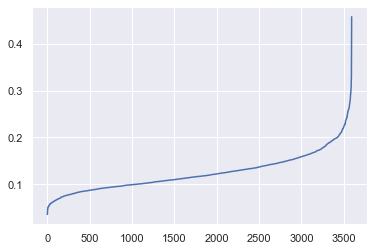

In [119]:
# will work to define an epsilon. For consistency, and since there is no train/test split applied on DBSCAN, will use only the x_test_scaled dataset
# will use x_train_scaled to determine optimum epsilon
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x_train_scaled)
distances, indices = nbrs.kneighbors(x_train_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [134]:
# the nearest neighbors classification (n = 5) shows the best value for epsilon, where the curvature is largest, is around 0.2
# will run dbscan with eps = 0.2 and mainpulte the min_samples until it fits 4 clusters as well

db = DBSCAN(eps = 0.2, min_samples = 4)
results = db.fit(x_test_scaled)
set(results.labels_.tolist())

{-1, 0, 1, 2}

In [135]:
# now that we have 4 clusters - outliers + 3 more
clusters = results.labels_

# add to df1
df1['DBSCAN Clusters'] = clusters
df1

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters,Agg Cluster Name,DBSCAN Clusters
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0,Star Player,1,Replacement Level,0
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0,Star Player,3,Star Player,0
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0,Star Player,3,Star Player,0
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0,Star Player,1,Replacement Level,0
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0,Star Player,3,Star Player,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3,Replacement Level,1,Replacement Level,0
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1,Starter Level,2,Starter Level,0
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0,Star Player,3,Star Player,0
653,81,37.0,0.554,11.2,9.9,23.3,12.0,18.4,15.4,7.9,Elton Brand,2004-05,4,Star Player,0,Star Player,3,Star Player,0


#### Cluster Analysis

In [136]:
first_db_clu = df1[df1['DBSCAN Clusters'] == 0]
first_db_clu

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters,Agg Cluster Name,DBSCAN Clusters
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0,Star Player,1,Replacement Level,0
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0,Star Player,3,Star Player,0
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0,Star Player,3,Star Player,0
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0,Star Player,1,Replacement Level,0
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0,Star Player,3,Star Player,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3,Replacement Level,1,Replacement Level,0
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1,Starter Level,2,Starter Level,0
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0,Star Player,3,Star Player,0
653,81,37.0,0.554,11.2,9.9,23.3,12.0,18.4,15.4,7.9,Elton Brand,2004-05,4,Star Player,0,Star Player,3,Star Player,0


In [137]:
first_db_clu.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters,DBSCAN Clusters
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.0
mean,68.784981,24.767908,0.530937,16.002375,10.839281,18.197561,5.036393,14.318164,9.675738,3.313928,2.549422,1.425546,1.304236,0.0
std,11.692072,7.829133,0.043029,7.638003,2.483929,4.359807,3.578320,5.409416,4.194611,4.479266,1.088179,1.179155,1.079913,0.0
min,30.000000,7.900000,0.392000,2.200000,4.100000,6.500000,0.000000,4.500000,3.000000,-4.100000,1.000000,0.000000,0.000000,0.0
25%,61.000000,18.500000,0.502000,10.200000,9.200000,15.025000,2.000000,9.900000,6.100000,0.300000,2.000000,0.000000,0.000000,0.0
50%,72.000000,24.600000,0.531000,14.400000,10.600000,17.800000,3.900000,13.400000,8.700000,2.000000,3.000000,1.000000,1.000000,0.0
75%,79.000000,31.300000,0.559000,20.500000,12.300000,20.800000,7.900000,18.075000,12.800000,5.000000,4.000000,3.000000,2.000000,0.0
max,84.000000,42.500000,0.669000,42.900000,21.000000,33.000000,17.000000,32.700000,23.900000,28.100000,4.000000,3.000000,3.000000,0.0


It appears that this first cluster contains almost all of the data, nothing can realy be determined from this, as the cluster cuts across all player performance profiles

Average Player

In [138]:
second_db_clu = df1[df1['DBSCAN Clusters'] == 1]
second_db_clu

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters,Agg Cluster Name,DBSCAN Clusters
1989,68,34.3,0.613,41.5,9.8,18.1,0.8,8.9,4.9,9.1,Jose Calderon,2008-09,4,Star Player,1,Starter Level,2,Starter Level,1
2293,81,32.8,0.615,39.3,13.0,24.5,1.5,9.4,5.7,14.1,Steve Nash,2009-10,4,Star Player,1,Starter Level,2,Starter Level,1
2630,75,33.3,0.601,41.9,13.0,23.0,1.8,10.2,6.0,12.2,Steve Nash,2010-11,4,Star Player,1,Starter Level,2,Starter Level,1
655,75,34.3,0.606,41.6,11.8,22.0,2.0,7.6,5.2,7.6,Steve Nash,2004-05,4,Star Player,1,Starter Level,2,Starter Level,1


In [139]:
second_db_clu.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters,DBSCAN Clusters
count,4.000000,4.000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.0,4.0,4.0,4.0
mean,74.750000,33.675,0.608750,41.075000,11.900000,21.90000,1.525000,9.025000,5.450000,10.750000,4.0,1.0,2.0,1.0
std,5.315073,0.750,0.006449,1.195478,1.509967,2.73374,0.525198,1.090489,0.493288,2.942221,0.0,0.0,0.0,0.0
min,68.000000,32.800,0.601000,39.300000,9.800000,18.10000,0.800000,7.600000,4.900000,7.600000,4.0,1.0,2.0,1.0
25%,73.250000,33.175,0.604750,40.950000,11.300000,21.02500,1.325000,8.575000,5.125000,8.725000,4.0,1.0,2.0,1.0
50%,75.000000,33.800,0.609500,41.550000,12.400000,22.50000,1.650000,9.150000,5.450000,10.650000,4.0,1.0,2.0,1.0
75%,76.500000,34.300,0.613500,41.675000,13.000000,23.37500,1.850000,9.600000,5.775000,12.675000,4.0,1.0,2.0,1.0
max,81.000000,34.300,0.615000,41.900000,13.000000,24.50000,2.000000,10.200000,6.000000,14.100000,4.0,1.0,2.0,1.0


This small cluster, appears to contain players, who are Star Level Players, although it is a very small, only containing 2 different players who both happen to be point guards

Star Player

In [140]:
third_db_clu = df1[df1['DBSCAN Clusters'] == 2]
third_db_clu

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters,Agg Cluster Name,DBSCAN Clusters
1636,82,37.7,0.619,6.3,15.1,21.4,11.0,31.6,21.7,18.5,Dwight Howard,2007-08,4,Star Player,0,Star Player,3,Star Player,2
1010,82,36.8,0.565,8.4,14.6,19.0,12.0,29.2,20.9,13.2,Dwight Howard,2005-06,4,Star Player,0,Star Player,3,Star Player,2
3664,71,33.7,0.600,9.1,15.9,22.0,11.4,27.9,20.1,12.8,Dwight Howard,2013-14,4,Star Player,0,Star Player,3,Star Player,2
1952,79,35.7,0.600,6.6,14.1,23.0,13.8,29.5,21.8,20.8,Dwight Howard,2008-09,4,Star Player,0,Star Player,3,Star Player,2


In [141]:
third_db_clu.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters,DBSCAN Clusters
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.000000,4.0000,4.000000,4.0,4.0,4.0,4.0
mean,78.500000,35.975000,0.596000,7.600000,14.925000,21.35,12.050000,29.550000,21.1250,16.325000,4.0,0.0,3.0,2.0
std,5.196152,1.723127,0.022524,1.363818,0.767572,1.70,1.236932,1.532971,0.7932,3.955903,0.0,0.0,0.0,0.0
min,71.000000,33.700000,0.565000,6.300000,14.100000,19.00,11.000000,27.900000,20.1000,12.800000,4.0,0.0,3.0,2.0
25%,77.000000,35.200000,0.591250,6.525000,14.475000,20.80,11.300000,28.875000,20.7000,13.100000,4.0,0.0,3.0,2.0
50%,80.500000,36.250000,0.600000,7.500000,14.850000,21.70,11.700000,29.350000,21.3000,15.850000,4.0,0.0,3.0,2.0
75%,82.000000,37.025000,0.604750,8.575000,15.300000,22.25,12.450000,30.025000,21.7250,19.075000,4.0,0.0,3.0,2.0
max,82.000000,37.700000,0.619000,9.100000,15.900000,23.00,13.800000,31.600000,21.8000,20.800000,4.0,0.0,3.0,2.0


It appears this third cluster again contains star players - this time only the one, who happens to be a big man/center

Star Player

In [142]:
fourth_db_clu = df1[df1['DBSCAN Clusters'] == -1]
fourth_db_clu

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters,Agg Cluster Name,DBSCAN Clusters
4508,29,21.2,0.519,18.7,11.3,13.2,7.0,21.4,14.1,1.1,Rondae Hollis-Jefferson,2015-16,2,Replacement Level,2,Below Replacement Level,0,Below Replacement Level,-1
2089,29,31.7,0.484,7.1,13.1,21.8,9.9,23.2,16.5,1.4,Elton Brand,2008-09,2,Replacement Level,2,Below Replacement Level,0,Below Replacement Level,-1
33,78,15.5,0.549,21.8,11.5,18.7,9.0,24.7,16.7,2.7,Arvydas Sabonis,2002-03,3,Starter Level,3,Replacement Level,1,Replacement Level,-1
3848,66,19.4,0.642,47.1,12.4,10.8,3.2,8.8,5.9,1.3,Pablo Prigioni,2013-14,2,Replacement Level,1,Starter Level,2,Starter Level,-1
3958,75,15.1,0.390,40.1,14.5,15.6,2.0,8.8,5.3,-1.2,Phil Pressey,2013-14,1,Below Replacement Level,1,Starter Level,2,Starter Level,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,78,16.2,0.595,42.7,15.6,12.9,3.7,9.8,6.6,1.3,Pablo Prigioni,2012-13,2,Replacement Level,1,Starter Level,2,Starter Level,-1
1818,36,15.8,0.579,20.0,12.2,19.5,1.0,8.0,4.5,0.5,Marcus Banks,2007-08,2,Replacement Level,2,Below Replacement Level,0,Below Replacement Level,-1
3517,33,28.4,0.495,11.9,6.1,17.0,2.2,13.4,7.7,1.0,Jason Richardson,2012-13,2,Replacement Level,2,Below Replacement Level,0,Below Replacement Level,-1
4582,38,14.6,0.491,30.7,7.9,11.6,3.2,27.9,15.7,0.2,Kevin Garnett,2015-16,2,Replacement Level,2,Below Replacement Level,0,Below Replacement Level,-1


In [143]:
fourth_db_clu.describe()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,ewa class,Cluster Label - KM,Agglom Clusters,DBSCAN Clusters
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0
mean,53.609756,22.864390,0.532459,18.980488,13.244878,17.008293,6.658049,16.444878,11.548293,2.698537,2.341463,1.868293,0.765854,-1.0
std,16.757904,7.956613,0.072104,10.851868,4.033868,6.605774,4.612036,7.359836,5.643725,4.433589,1.107235,0.889602,0.961925,0.0
min,26.000000,7.000000,0.340000,1.500000,4.600000,0.000000,0.000000,0.000000,0.000000,-4.800000,1.000000,0.000000,0.000000,-1.0
25%,39.000000,16.000000,0.483000,9.500000,10.600000,12.100000,2.400000,10.500000,6.400000,-0.100000,1.000000,1.000000,0.000000,-1.0
50%,54.000000,21.900000,0.526000,18.000000,13.100000,15.600000,5.300000,15.900000,11.100000,1.300000,2.000000,2.000000,0.000000,-1.0
75%,67.000000,29.300000,0.585000,25.500000,15.700000,21.800000,11.000000,21.700000,16.300000,3.800000,3.000000,2.000000,1.000000,-1.0
max,82.000000,39.400000,0.697000,47.100000,28.200000,38.200000,19.100000,34.900000,23.500000,22.200000,4.000000,3.000000,3.000000,-1.0


This final cluster, marked as outliers by the DBSCAN algorithm, appears again to be fairly spread out amongst players. No way that a theme can be gained from this cluster

Average Player

In [145]:
# complete final data dataframe, 0 assigning Cluster Name to each row
db_name = []

for i in df1['DBSCAN Clusters']:
    if i == 0:
        db_name.append('Average Player')
    elif i == 1:
        db_name.append('Star Player')
    elif i == 2:
        db_name.append('Star Player')
    else: 
        db_name.append('Average Player')
        
df1['DB Cluster Name'] = db_name
df1

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season,ewa class,EWA Label,Cluster Label - KM,Cluster Name - KM,Agglom Clusters,Agg Cluster Name,DBSCAN Clusters,DB Cluster Name
4847,80,28.7,0.530,12.5,7.4,19.1,5.3,14.1,9.6,3.4,Aaron Gordon,2016-17,3,Starter Level,0,Star Player,1,Replacement Level,0,Average Player
4414,52,34.4,0.528,17.4,10.5,22.9,3.5,20.2,11.5,6.4,Marc Gasol,2015-16,4,Star Player,0,Star Player,3,Star Player,0,Average Player
2095,81,34.0,0.565,22.2,14.4,14.6,5.3,13.8,9.6,4.1,Boris Diaw,2008-09,3,Starter Level,0,Star Player,3,Star Player,0,Average Player
1421,78,32.9,0.540,9.9,11.2,21.0,6.0,15.7,10.9,4.3,Al Harrington,2006-07,3,Starter Level,0,Star Player,1,Replacement Level,0,Average Player
1644,77,36.4,0.568,11.5,11.2,27.5,7.0,14.9,11.0,15.1,Carmelo Anthony,2007-08,4,Star Player,0,Star Player,3,Star Player,0,Average Player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,75,23.2,0.513,12.9,15.9,9.2,16.0,24.1,20.2,2.1,Jeff Foster,2006-07,3,Starter Level,3,Replacement Level,1,Replacement Level,0,Average Player
1199,65,15.7,0.491,26.3,12.5,17.0,3.0,14.7,8.7,0.7,Toni Kukoc,2005-06,2,Replacement Level,1,Starter Level,2,Starter Level,0,Average Player
329,67,40.1,0.492,22.0,9.5,29.2,3.0,9.6,6.1,7.1,Baron Davis,2003-04,4,Star Player,0,Star Player,3,Star Player,0,Average Player
653,81,37.0,0.554,11.2,9.9,23.3,12.0,18.4,15.4,7.9,Elton Brand,2004-05,4,Star Player,0,Star Player,3,Star Player,0,Average Player


In [146]:
# accuracy level measure: want to check and see if the clustering algorithm is placing the players into the same clusters/buckets are the ewa 
# The DBSCAN algorithm was definitely the least 'accurate' of the clustering algorithms. I beleive this for the following reasons
# 1) I beleive the DBSCAN algorithm is confued by the relative 'closeness' of many data points
# 2) This particular data set does much better with a set point (centroid) to which measure clusters around

# compare total number of rows in df1
# To the number of rows where the ewa class labela nd cluster label match
df4 = df1[df1['EWA Label'] == df1['DB Cluster Name']]
print('Accuracy of clustering vs EWA Classification: ', round(df4.shape[0]/df1.shape[0], 2))

Accuracy of clustering vs EWA Classification:  0.0
